# chapter 02. 머신러닝 프로젝트 처음부터 끝까지
## 2.1. 실제 데이터로 작업하기 
- 캘리포니아 주택 가격 데이터셋을 사용합니다.

## 코드 정리하기
- os : 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게 해줌
  - 파이썬을 이용해 파일을 복사하거나 디렉터리를 생성하고 특정 디렉터리 내의 파일 목록을 구하고자 할 때 os 모듈을 사용하면 됨
  - os.makedirs 
    - 폴더를 재귀적으로 사용하고 싶은 경우에 사용함
    - mkdir로 폴더를 생성할 때 지정한 경로가 존재하지 않으면 에러가 발생
    - but, makedirs를 사용하면 경로가 없는 경우 중간에 지정한 폴더를 생성함
    - 주의할 점 : makedirs에 지정한 폴더 중 마지막에 지정한 폴더가 이미 만들어져 있는 경우에는 에러가 발생
      - 만약 존재하지 않는 경우 폴더를 생성하고 존재하는 경우에 에러로 표시하고 싶지 않는 경우에는 exist_ok=True를 설정해주면 됨
  - os.path.join 
    - 경로를 병합하여 새 경로 생성
    - print(os.path.join("/Users/evan/dev/python/web-crawler-py/parsed_data", "test"))
      - 결과 : Users/evan/dev/python/web-crawler-py/parsed_data/test

- urllib : URL 작업을 위한 여러 모듈을 모은 패키지
  - urllib.request : URL 주소의 문서를 열고 읽을 수 있음
    - urllib.request.urlretrieve : URL로 표시된 네트워크 객체(URL 주소의 문서)를 로컬 파일로 저장, 즉 직접 다운로드가 가능함
      - urllib.request.urlretrieved(url,로컬에 저장될 파일 이름)
    - urllib.request.urlopen : URL로 표시된 네트워크 객체를 파이썬 실행환경의 메모리로 로드

- tarfile : 웹상의 압축 파일을 파이썬에서 풀 때 사용할 수 있게 해줌
  - tarfile.open : 압축 파일을 열어줌
  - extractall(압축풀 경로) : 압축을 풀어줌
  - close() : 압축파일을 닫아줌



In [ ]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT="http://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH=os.path.join("datasets","housing")
HOUSING_URL=DOWNLOAD_ROOT+"datasets/housing/housing.tgz"

In [ ]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  os.makedirs(housing_path,exist_ok=True)
  tgz_path=os.path.join(housing_path,"housing.tgz")
  urllib.request.urlretrieve(housing_url,tgz_path)
  housing_tgz=tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [ ]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path= os.path.join(housing_path,"housing.csv")
  return pd.read_csv(csv_path)

## 코드 정리 2
### DataFrame
- head() : 처음 다섯 행 확인
- info() : 데이터에 대한 간략한 설명과 특히 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수를 확인하는데 유용함
- value_counts() : 특정 열의 객체가 범주형일 경우, 어떤 카테고리가 있고 각 카테고리마다 얼마나 많은 구역이 있는지 확인 가능
- describe() : 숫자형 특성의 요약 정보를 보여줌(널 값 제외)

### matplotlib
- %matplotlib inline : 주피터 노트북의 매직 명령
  - 주피터 자체의 백엔드에서 matplotlib을 사용하도록 설정함
- housing.hist : 숫자형 특성을 히스토그램으로 그릴 때 사용

### numpy
- np.random : 다양한 함수를 사용해서 특정 범위, 개수, 형태를 갖는 난수 생성에 활용할 수 있음
  - np.random.permutation() : 무작위로 섞인 배열을 만듦
    - 괄호 안까지의 숫자를 가진 배열을 만듦
    - 배열이 들어가면 모양은 그대로 유지한 무작위 배열을 만듦

### zlib
- from zlib import crc32 : 지정해 준 문자열의 crc-32 값을 구하는 방법


In [ ]:
#코랩에서 가져오는 방법을 몰라서 제 개인 드라이브에 올려서 연동 후 가져왔습니다.
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
housing=pd.read_csv('/gdrive/My Drive/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22fb5b14e0>,
      dtype=object)

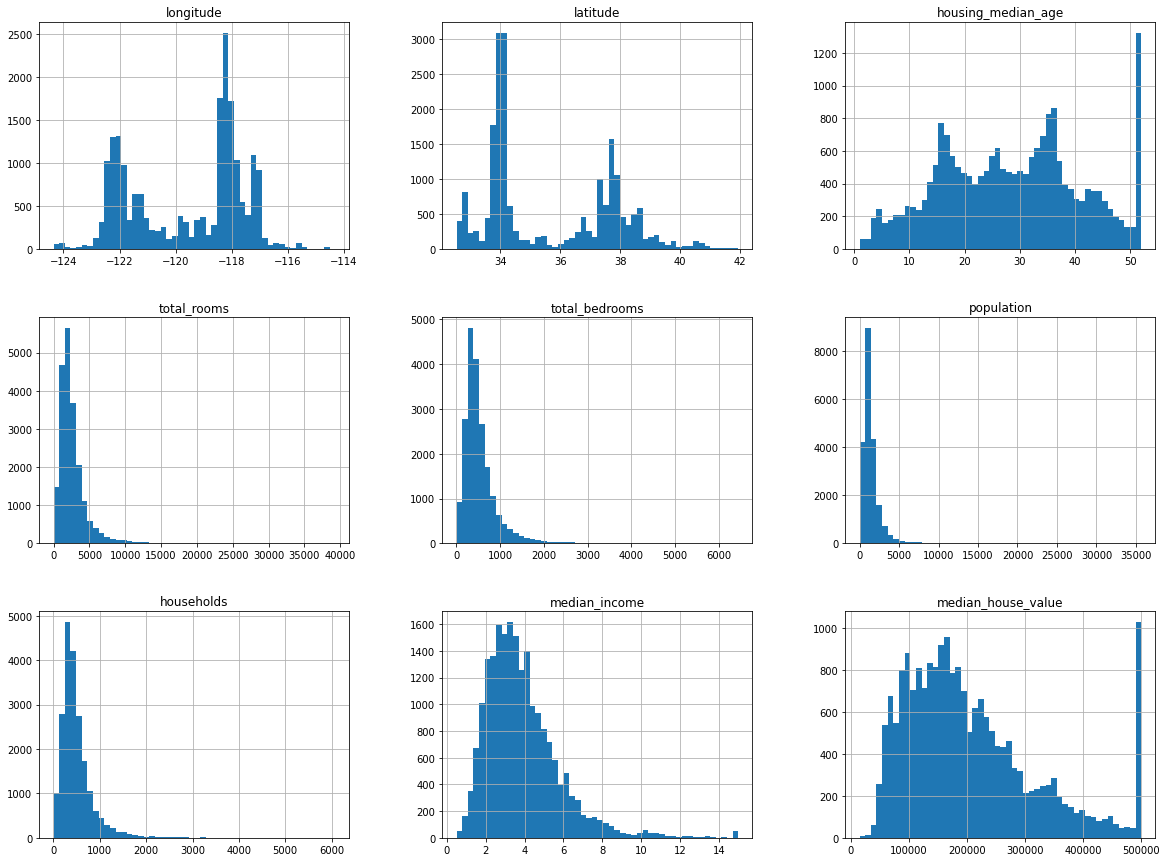

In [ ]:
#matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

In [ ]:
#테스트 세트 만들기
import numpy as np
def split_train_test(data,test_ratio):
  shuffled_indices=np.random.permutation(len(data))
  test_set_size=int(len(data)*test_ratio)
  test_indices=shuffled_indices[:test_set_size]
  train_indices=shuffled_indices[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]

In [ ]:
#완벽하지 않는 방법
train_set,test_set=split_train_test(housing,0.2)
print(len(train_set))
len(test_set)

16512


4128

In [ ]:
#완벽한 방법
from zlib import crc32
def test_set_check(identifier,test_ratio):
  return crc32(np.int64(identifier))&0xffffffff < test_ratio *2**32
def split_train_test_by_id(data,test_ratio,id_column):
  ids=data[id_column]
  in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio))
  return data.loc[~in_test_set],data.loc[in_test_set]

In [ ]:
housing_with_id=housing.reset_index()
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,"index")

## 코드 정리 3
### sklearn
- from sklearn.model_selection import train_test_split
  - 데이터셋을 train과 test로 나누는 함수
  - random_state : 난수 초깃값을 지정할 수 있음
  - 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눌 수 있음

- from sklearn.model_selection import StratifiedShuffleSplit
  - train과 test가 편향될 가능성을 줄이고자 계층별로 나누는 방법

In [ ]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

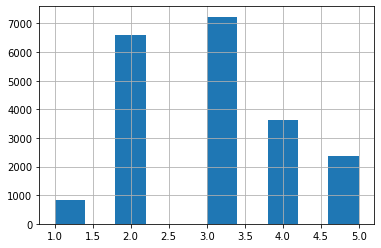

In [ ]:
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]

In [ ]:
for set_ in (strat_train_set,strat_test_set):
  set_.drop("income_cat",axis=1,inplace=True)

## 코드 정리 4
- dataframe.plot(kind,x,y,alpha,s,label,c,cmap,colorbar)
  - kind : plot의 형태
  - x: x축에 들어갈 데이터
  - y: y축에 들어갈 데이터
  - alpha : 원의 크기
  - s: 원의 반지름에 집어넣을 데이터
  - c: 색깔
  - cmap: 컬러맵
- dataframe.corr() : 피어슨 상관관계(표준 상관계수)

### from pandas.plotting import scatter_matrix
- scatter_matrix : 특성 사이의 상관관계를 확인하는 방법
  - 숫자형 특성 사이에 산점도를 그려주는 함수

### 데이터 정제 방법(누락된 특성)
- dropna : na값 제거
- drop : 특정 행이나 열 제거
- fillna : na값을 특정 값으로 대체
- 사이킷런의 SimpleImputer(from sklearn.impute import SimpleImputer)
  - SimpleImputer(strategy) : 누락된 값을 특성의 어떤 값으로 대체(imputer=SimpleImputer()라고 하자)
  - imputer.fit : 훈련 데이터에 적용
  - imputer.statistics\_ : 각 특성의 중간값을 계산해서 그 결과를 객체의 statistics_에 저장 = datafram.median().values
  - imputer.transform() : 훈련 세트에서 누락된 값을 학습한 중간값으로 바꿈
    - 출력 값 : 바꾸면 넘파이 배열 바뀌어짐

### 범주형 데이터를 숫자로 변환하는 방법
- 사이킷런의 OrdinalEncoder
  - from sklearn.preprocessing import OrdinalEncoder
  - OrdinalEncoder() : 범주형 특성을 숫자로 변환(ordinal_encoder=OrdinalEncoder()이라 하자)
  - ordinal_encoder.fit_transfrom() : 범주형 특성을 숫자로 변환
  - ordinal\_encoder.categories\_ : 범주형 변수의 목록을 얻을 수 있음
    - 범주형 특성마다 카테고리들의 배열을 담은 리스트가 반환됨
  - 해당 표현 방식의 문제 : 머신러닝 알고리즘이 가까이 있는 두 값이 떨어져 있는 두 값보다 더 비슷하다고 생각한다는 점

- 사이킷런의 OneHotEncoder (원-핫 벡터)
  - from sklearn.preprocessing import OneHotEncoder
  - OneHotEncoder() : 범주의 값을 원-핫 벡터로 바꾸기(cat_encoder=OneHotEncoder()라 하자)
  - cat_encoder.fit_transform() : 데이터 프레임에 있는 범주의 값을 원-핫 벡터로 바꾼다
    - 출력 값: 사이파이 희소 행렬  
  - cat\_encoder.categories_ : 카테고리 리스트


In [ ]:
housing=strat_test_set.copy()

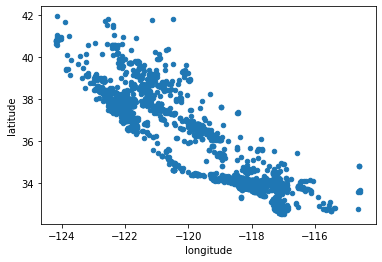

In [ ]:
housing.plot(kind='scatter',x='longitude',y='latitude')

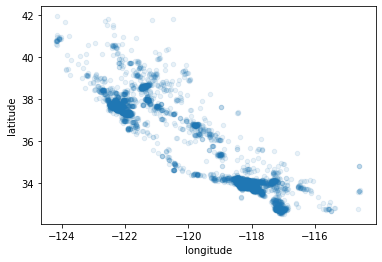

In [ ]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

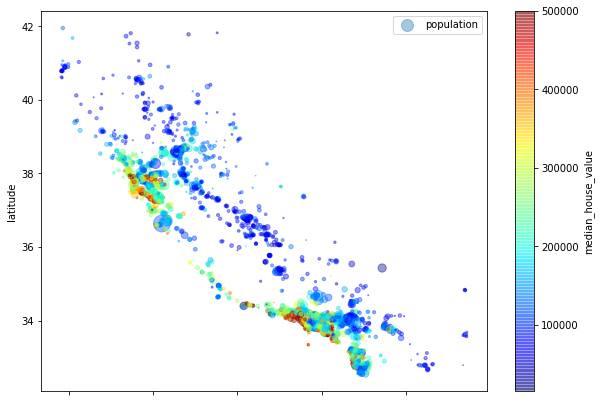

In [ ]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing['population']/100,label='population',
             figsize=(10,7),c='median_house_value',cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [ ]:
corr_matrix=housing.corr()

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691831
total_rooms           0.131435
housing_median_age    0.071357
households            0.071242
total_bedrooms        0.057568
population           -0.016033
longitude            -0.039987
latitude             -0.150124
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22f9fbd940>,
      dtype=object)

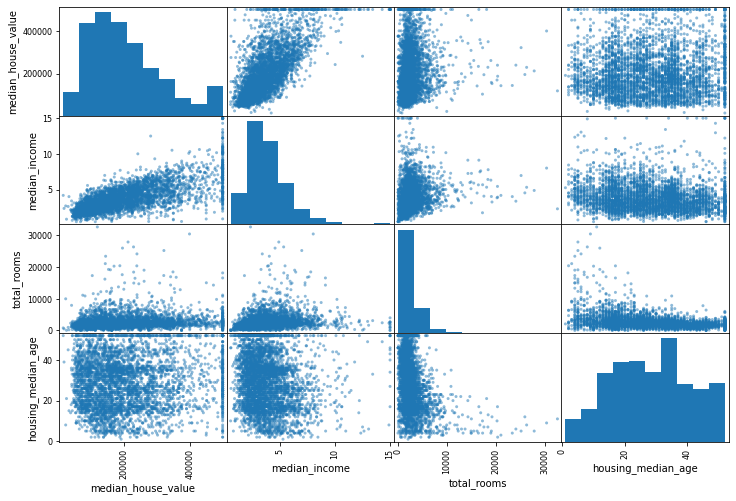

In [ ]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

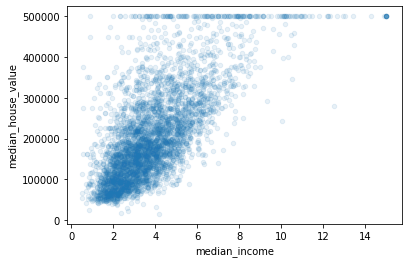

In [ ]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [ ]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing['total_rooms']
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691831
rooms_per_household         0.192575
total_rooms                 0.131435
housing_median_age          0.071357
households                  0.071242
total_bedrooms              0.057568
population                 -0.016033
longitude                  -0.039987
population_per_household   -0.135142
latitude                   -0.150124
bedrooms_per_room          -0.240362
Name: median_house_value, dtype: float64

In [ ]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [ ]:
housing.dropna(subset=["total_bedrooms"]) # 옵션 1
housing.drop("total_bedrooms",axis=1) # 옵션 2
median=housing["total_bedrooms"].median() # 옵션 3
housing["total_bedrooms"].fillna(median,inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num=housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [ ]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [ ]:
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [ ]:
#텍스트와 범주형 특성 다루기
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 책에서 나온 변환기
- TransformerMixin : fit_transform()을 구현할 때 불러야하는 것
- BaseEstimator : 상속 시 하이퍼파라미터 튜닝에 필요한 두 메서드 get_params()와 set_params()을 얻게 됨

### 사이킷런의 Pipeline
- 사이킷런에는 연속된 변환을 순서대로 처리할 수 있도록 도와줌
- from sklearn.pipeline import Pipeline

### 사이킷런의 특성 스케일링
- min-max 스케일링(정규화) : 0~1 범위에 들도록 값을 이동하고 스케일을 조정하면 됨
  - MinMaxScaler 변환기
  - feature_range : 0~1 사이를 원하지 않는다면 feature_range 매개변수로 범위를 변경할 수 있음
- standardscaler(표준화) : 평균을 뺀 후 표준편차로 나누어 결과 분포의 분산이 1이 되도록 함
  - 범위의 상한과 하한이 없어 어떤 알고리즘에서는 문제가 될 수 있음
  - 이상치에 영향을 덜 받음
  - StandardScaler 변환기
- **Caution** : 모든 변환기에서 스케일링은 전체 데이터가 아니고 훈련 데이터에 대해서만 fit() 메서드를 적용
  - 그런 다음 훈련 세트와 테스트 세트에 대해 transform() 메서드를 사용함

- ColumnTarnsformer : 숫자형과 범주형을 둘 다 스케일링할 수 있는 메서드


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
  def __init__(self,add_bedrooms_per_room=True):
    self.add_bedrooms_per_room=add_bedrooms_per_room
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
    population_per_household=X[:,population_ix]/X[:,households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
      return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
    else:
      return np.c_[X,rooms_per_household,population_per_household]
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
                       ("imputer",SimpleImputer(strategy="median")),
                       ("atrribs_adder",CombinedAttributesAdder()),
                       ("std_scaler",StandardScaler())])
housing_num_tr=num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]
full_pipeline=ColumnTransformer([
                                 ("num",num_pipeline,num_attribs),
                                 ("cat",OneHotEncoder(),cat_attribs)
])
housing_prepared=full_pipeline.fit_transform(housing)

## 모델
- 선형 회귀 모델 
  - from sklearn.linear_model import LinearRegression
- 회귀 나무
  - from sklearn.tree import DecisionTreeRegressor
- 랜덤포레스트
  - from sklearn.ensemble import RandomForestRegressor
## 교차 검증을 사용한 평가
- k-폴드 교차 검증 
  - from sklearn.model_selection import cross_val_score